Verificando informações referentes a sexagem de animais.

In [1]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns


plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20 #tamanho da fonte

Verificando informações referente aos machos

In [2]:
#Filtros para trabalhar com os dados da minha dataframe original

sexa_ani = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
sexa_ani = sexa_ani[(sexa_ani['num_sex_m'] < 200) 
                    & (sexa_ani['util'] == 'sex')
                    & (sexa_ani['ling'] != 'Test')
                    & (sexa_ani['num_sex_m'] != 666)]
 #descarte[(descarte['obs_desc'] != 'AAA')
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    sexa_ani[d] = pd.to_datetime(sexa_ani[d], unit = 's')
    
sexa_ani.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
458,2014-10-30 12:06:36,Tania,S129WT,4,m,2014-10-21 12:43:17,374,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,4,666,666,666,AAA,AAA
465,2014-10-30 12:34:35,Tania,Swiss E,16,m,2014-10-06 18:11:54,463,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,3,666,666,666,AAA,I
467,2014-10-30 12:34:35,Tania,Swiss E,13,m,2014-10-06 18:11:54,465,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,3,666,666,666,AAA,I
489,2014-11-05 17:13:53,Tania,S129WT,666,m,2014-10-21 12:43:17,376,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-05 17:13:53,4,666,666,666,AAA,AAA
517,2014-11-11 12:26:51,Tania,C57BL06WT,6,m,2014-11-11 12:25:07,515,sex,666,1970-01-01 00:11:06,...,2014-11-11 12:26:51,2014-11-11 12:26:51,6,2014-11-11 12:26:51,4,666,666,666,AAA,AAA


In [3]:
sexa_ani['num_sex_m'].sum()

5258

In [4]:
len(sexa_ani)

1529

In [5]:
sexa_ani['ling'].value_counts()

Balb/c         371
C57BL/6        352
S129KO         197
C3H             89
129/SV-E        83
Swiss-2 D       45
Swiss-1 B       31
Swiss-2 C       30
Swiss-1 A       29
Swiss-2 E       28
Swiss-2 B       27
Swiss-1 E       26
S129WT          25
Swiss-2 A       25
C57BL06WT       24
Swiss-1 D       24
Swiss-1 C       24
Swiss A         14
Swiss C         11
Swiss E         11
Swiss D         11
Swiss B         10
Swiss/CFW C      7
 S129WT          7
Swiss/CFW B      6
AG129            6
Swiss/CFW        6
Swiss/CFW A      4
Swiss/CFW D      3
 S129KO          3
Name: ling, dtype: int64

In [6]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

sexa_ani['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
#sexa_ani[(sexa_ani['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

sexa_ani['ling'].replace(' S129KO', 'S129KO', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

sexa_ani['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

sexa_ani['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

sexa_ani['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

sexa_ani['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

sexa_ani['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

sexa_ani['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 E')].info()
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

sexa_ani['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 E')].info()

In [7]:
sexa_ani['ling'].value_counts()

C57BL/6      376
Balb/c       371
S129KO       200
129/SV-E     115
C3H           89
Swiss-1 A     53
Swiss-1 B     47
Swiss-2 D     45
Swiss-1 C     42
Swiss-1 D     38
Swiss-1 E     37
Swiss-2 C     30
Swiss-2 E     28
Swiss-2 B     27
Swiss-2 A     25
AG129          6
Name: ling, dtype: int64

Text(0, 0.5, 'Linhagens')

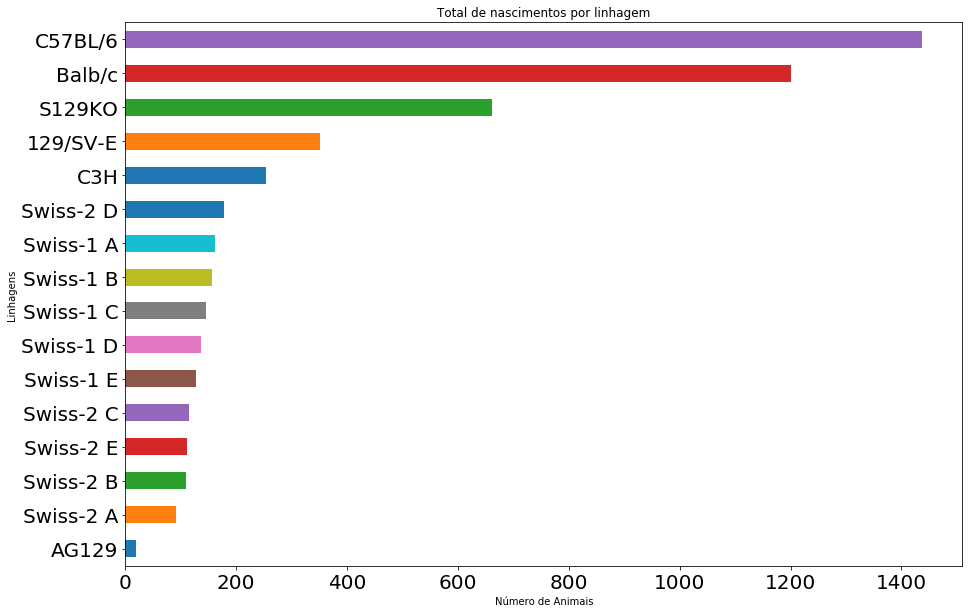

In [8]:
#Numero total de machos produzidos 

plt.figure(figsize=(15,10)) #tamanho do gráfico
plt.title('Total de nascimentos por linhagem') #título do gráfico

plot = sexa_ani.groupby('ling') #pedindo pra agrupar por linhagem
plot['num_sex_m'].sum().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
kind='barh'
)
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y

Text(0, 0.5, 'Linhagens')

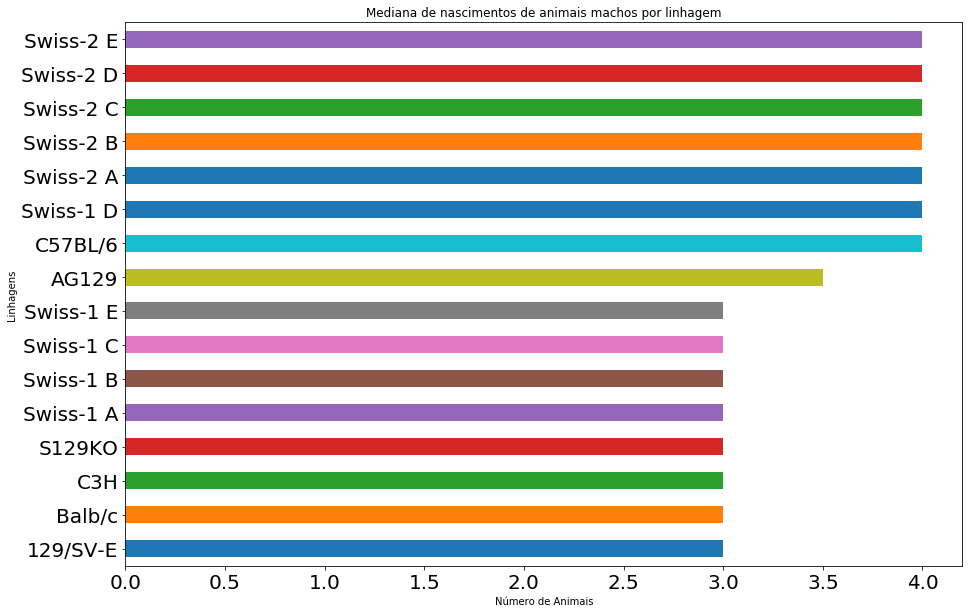

In [9]:
# Calculando a mediana da produção de animais machos

plt.figure(figsize=(15,10)) #tamanho do gráfico
plt.title('Mediana de nascimentos de animais machos por linhagem') #título do gráfico

plot = sexa_ani.groupby('ling') #pedindo pra agrupar por linhagem
plot['num_sex_m'].median().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
kind='barh'
)


plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y

In [10]:
# plt.figure(figsize=(15,15))
# plt.title('Total de nascimentos por linhagem apresentando outliers')
# sns.boxplot(
    
#     y='ling',
#     x='num_nasc',
# #     hue='ling',
#     data=sexa_ani.sort_values('ling')
# )
# plt.xlabel('Número de Animais com outliers') #definindo nome do eixo X
# plt.ylabel('Linhagens') #definindo nome do eixo Y
